In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from tqdm import tqdm

In [98]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [99]:
cd /content/gdrive/MyDrive/ASU/Classes/SML/Medical-Data-Recognition/

/content/gdrive/MyDrive/ASU/Classes/SML/Medical-Data-Recognition


In [100]:
df = pd.read_csv('./data/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [101]:
df.shape

(569, 33)

In [102]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [103]:
df=df.drop(['Unnamed: 32'], axis=1)

In [104]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [106]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [107]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Visualization

In [108]:
df=df.drop(columns = ['id'])

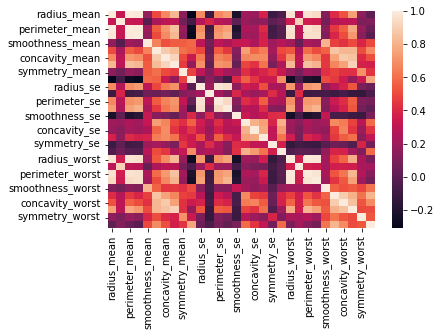

In [109]:
data_cor = df.corr()
sns.heatmap(data_cor)
data_df_upper = data_cor.where(np.triu(np.ones(data_cor.shape, dtype=int), k=1).astype(bool))
cor80 = [col for col in data_df_upper.columns if any(abs(data_df_upper[col]) >= 0.8)]

In [110]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

(10.0, 100.0)

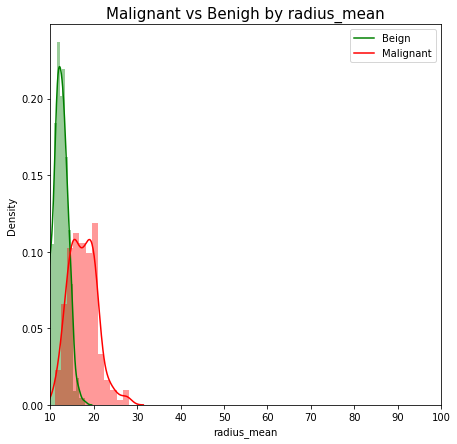

In [111]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['diagnosis'] == "B"]['radius_mean'],color='green')
sns.distplot(df[df['diagnosis'] == "M"]['radius_mean'],color='red')
plt.legend(['Beign', 'Malignant'] ,loc = 'upper right')

plt.title('Malignant vs Benigh by radius_mean',fontsize=15)
plt.xlim([10,100])

(10.0, 100.0)

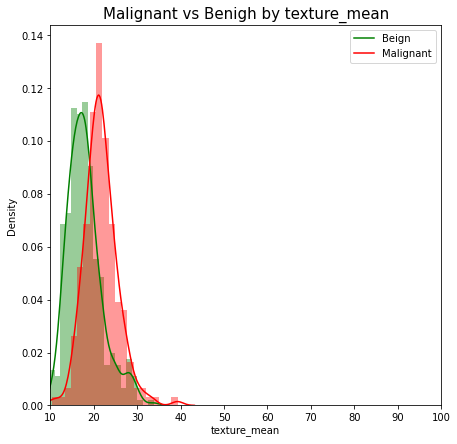

In [112]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['diagnosis'] == "B"]['texture_mean'],color='green')
sns.distplot(df[df['diagnosis'] == "M"]['texture_mean'],color='red')
plt.legend(['Beign', 'Malignant'] ,loc = 'upper right')
plt.title('Malignant vs Benigh by texture_mean',fontsize=15)
plt.xlim([10,100])


(10.0, 100.0)

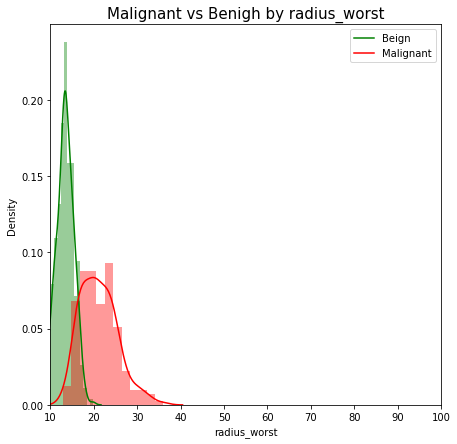

In [113]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['diagnosis'] == "B"]['radius_worst'],color='green')
sns.distplot(df[df['diagnosis'] == "M"]['radius_worst'],color='red')
plt.legend(['Beign', 'Malignant'] ,loc = 'upper right')
plt.title('Malignant vs Benigh by radius_worst',fontsize=15)
plt.xlim([10,100])

(10.0, 100.0)

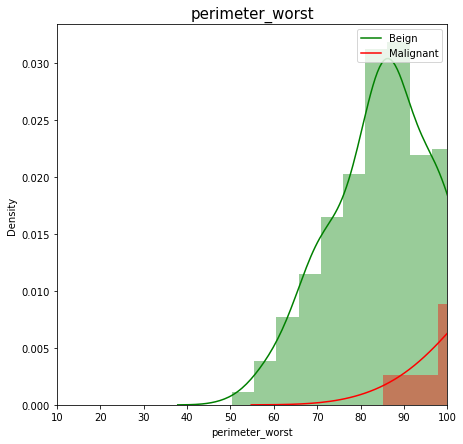

In [114]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['diagnosis'] == "B"]['perimeter_worst'],color='green')
sns.distplot(df[df['diagnosis'] == "M"]['perimeter_worst'],color='red')
plt.legend(['Beign', 'Malignant'] ,loc = 'upper right')
plt.title('perimeter_worst',fontsize=15)
plt.xlim([10,100])

## EDA New

In [115]:
data = df

In [116]:
# data.drop(columns = ['id'],inplace = True)

In [117]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [118]:
# data.drop(columns = ['id'],inplace = True)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

# data['age'] = data['age'].astype(int)
df1 = data.copy(deep = True)

Categorical Features : diagnosis
Discrete Features : radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst


In [119]:
le = LabelEncoder()
text_data_features = categorical_features
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(categorical_features):
    data[i] = le.fit_transform(df1[i])
    l3.append(list(data[i].unique())); l4.append(list(le.inverse_transform(data[i].unique())))
    print(i,' : ',data[i].unique(),' = ',le.inverse_transform(data[i].unique()))

Label Encoder Transformation


100%|██████████| 1/1 [00:00<00:00, 120.77it/s]

diagnosis  :  [1 0]  =  ['M' 'B']


In [120]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [121]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


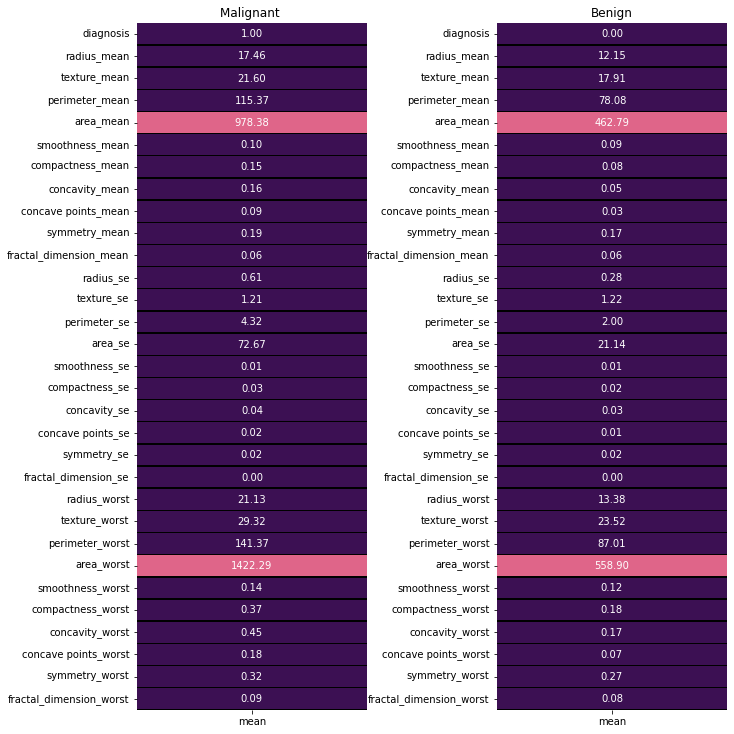

In [122]:
malignant = data[data['diagnosis'] == 1].describe().T
benign = data[data['diagnosis'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(malignant[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Malignant ');

plt.subplot(1,2,2)
sns.heatmap(benign[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Benign');

fig.tight_layout(pad = 0)


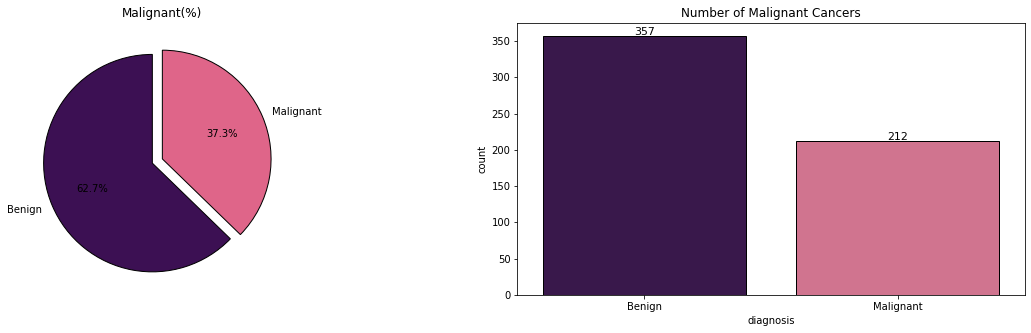

In [123]:
df1 = data.copy(deep = True)

l = list(df1['diagnosis'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Benign','Malignant'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Malignant(%)');

plt.subplot(1,2,2)
ax = sns.countplot('diagnosis',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Benign','Malignant'])
plt.title('Number of Malignant Cancers');
plt.show()

In [124]:
discrete_features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## Data Preprocessing

In [126]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [127]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [128]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


After label encoding, our labels would be. 

*   1: Malignant
*   0: Benign




In [129]:
df.columns, len(df.columns)

(Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'],
       dtype='object'), 31)

In [130]:
x = df.iloc[:, 1:]
y = df.iloc[:,0].values

In [131]:
df.iloc[:, 1:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [132]:
# #df=df.drop(['id'], axis=1)
x_df = df.drop(['diagnosis'], axis=1)
x = x_df.values
y = df['diagnosis'].values
x_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [133]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [134]:
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
# x = np.array(ct.fit_transform(x))

In [135]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train',X_train.shape)
print('Number transations x_test',X_test.shape)
print('Number transations y_train',y_train.shape)
print('Number transations y_test',y_test.shape)

Number transations x_train (455, 30)
Number transations x_test (114, 30)
Number transations y_train (455,)
Number transations y_test (114,)


In [136]:
print('Number transations   x_train',X_train.shape)
print('Number transations   y_train',y_train.shape)
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Number transations   x_train (455, 30)
Number transations   y_train (455,)
Before OverSampling, counts of label 1: 165
Before OverSampling, counts of label 0: 290 



In [137]:
# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

# print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

# print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
# print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

In [138]:
# ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
# X_train = np.array(ct.fit_transform(X_train))
# X_test = np.array(ct.fit_transform(X_test))

## Model Selection

In [139]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])

XGBClassifier :
Accuracy Score:  0.9736842105263158

K-Fold Validation Mean Accuracy: 95.60 %

K-Fold Validation Max Accuracy: 100.00 %

Standard Deviation: 2.97 %

ROC AUC Score: 0.97 %

Precision: 0.98 %

Recall: 0.96 %

F1 Score: 0.97 %
----------------------------------------

Logistic Regression :
Accuracy Score:  0.9473684210526315

K-Fold Validation Mean Accuracy: 94.08 %

K-Fold Validation Max Accuracy: 97.83 %

Standard Deviation: 3.76 %

ROC AUC Score: 0.95 %

Precision: 0.92 %

Recall: 0.96 %

F1 Score: 0.94 %
----------------------------------------

SVM :
Accuracy Score:  0.9298245614035088

K-Fold Validation Mean Accuracy: 90.34 %

K-Fold Validation Max Accuracy: 95.56 %

Standard Deviation: 3.95 %

ROC AUC Score: 0.92 %

Precision: 0.98 %

Recall: 0.85 %

F1 Score: 0.91 %
----------------------------------------

KNeigbors :
Accuracy Score:  0.9385964912280702

K-Fold Validation Mean Accuracy: 92.75 %

K-Fold Validation Max Accuracy: 97.83 %

Standard Deviation: 3.81 %



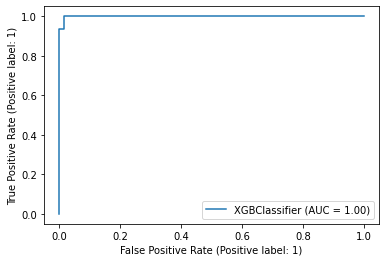

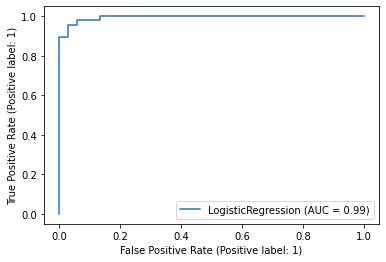

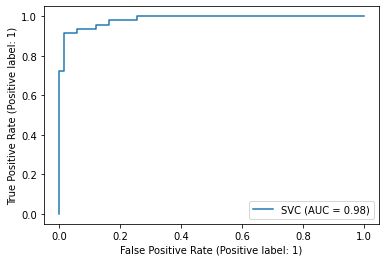

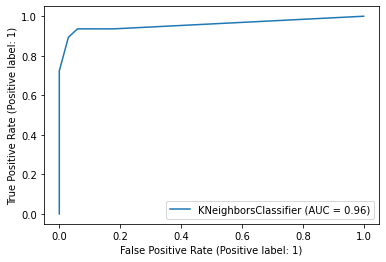

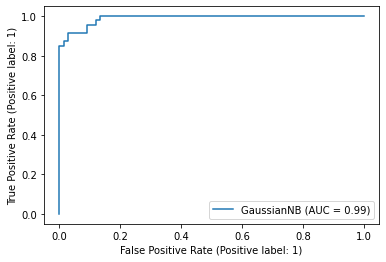

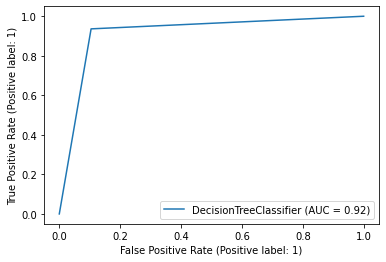

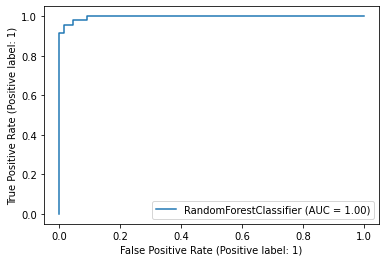

In [140]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #cm = confusion_matrix(y_test,y_pred)

    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

    # k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    #print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    #print(classification_report(y_test, y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('K-Fold Validation Max Accuracy: {:.2f} %'.format(accuracies.max()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))

    plot_roc_curve(model, X_test, y_test)

    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.max()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

In [141]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','K-Fold Max Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2


,Model,Accuracy,K-Fold Mean Accuracy,K-Fold Max Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
0,XGBClassifier,97.368421,95.603865,100.000000,2.967537,0.971261,0.978261,0.957447,0.967742
6,RandomForest,96.491228,96.048309,100.000000,3.070184,0.966974,0.938776,0.978723,0.958333
1,Logistic Regression,94.736842,94.082126,97.826087,3.763669,0.948873,0.918367,0.957447,0.937500
3,KNeigbors,93.859649,92.748792,97.826087,3.809414,0.938234,0.916667,0.936170,0.926316
4,GaussianNB,92.982456,94.077295,97.777778,2.915586,0.927596,0.914894,0.914894,0.914894
2,SVM,92.982456,90.342995,95.555556,3.950642,0.918069,0.975610,0.851064,0.909091
5,DecisionTree,91.228070,93.410628,97.826087,2.924777,0.915846,0.862745,0.936170,0.897959


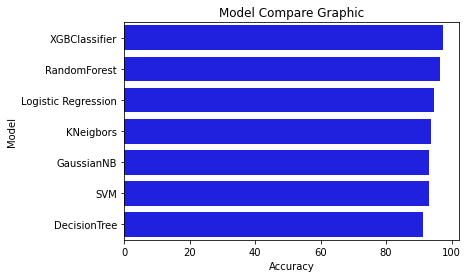

In [142]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');

### SMOTE

In [143]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling,   shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling,   shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling,   counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling,   counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling,   shape of train_x: (580, 30)
After OverSampling,   shape of train_y: (580,)
After OverSampling,   counts of label 1: 290
After OverSampling,   counts of label 0: 290


In [144]:
lsts_1 = []
for m in range(len(models)):
    lsts_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    #cm = confusion_matrix(y_test,y_pred)

    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

    # k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    #print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    #print(classification_report(y_test, y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('K-Fold Validation Max Accuracy: {:.2f} %'.format(accuracies.max()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lsts_2.append(models[m][0])
    lsts_2.append(accuracy_score(y_test,y_pred)*100)
    lsts_2.append(accuracies.mean()*100)
    lsts_2.append(accuracies.max()*100)
    lsts_2.append(accuracies.std()*100)
    lsts_2.append(roc)
    lsts_2.append(precision)
    lsts_2.append(recall)
    lsts_2.append(f1)
    lsts_1.append(lsts_2)

XGBClassifier :
Accuracy Score:  0.9736842105263158

K-Fold Validation Mean Accuracy: 96.38 %

K-Fold Validation Max Accuracy: 98.28 %

Standard Deviation: 0.93 %

ROC AUC Score: 0.97 %

Precision: 0.98 %

Recall: 0.96 %

F1 Score: 0.97 %
----------------------------------------

Logistic Regression :
Accuracy Score:  0.9385964912280702

K-Fold Validation Mean Accuracy: 94.83 %

K-Fold Validation Max Accuracy: 98.28 %

Standard Deviation: 1.72 %

ROC AUC Score: 0.94 %

Precision: 0.88 %

Recall: 0.98 %

F1 Score: 0.93 %
----------------------------------------

SVM :
Accuracy Score:  0.9298245614035088

K-Fold Validation Mean Accuracy: 89.48 %

K-Fold Validation Max Accuracy: 98.28 %

Standard Deviation: 4.04 %

ROC AUC Score: 0.93 %

Precision: 0.91 %

Recall: 0.91 %

F1 Score: 0.91 %
----------------------------------------

KNeigbors :
Accuracy Score:  0.9210526315789473

K-Fold Validation Mean Accuracy: 93.10 %

K-Fold Validation Max Accuracy: 100.00 %

Standard Deviation: 3.36 %



In [145]:
dfs2 = pd.DataFrame(lsts_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','K-Fold Max Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

dfs2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
dfs2

,Model,Accuracy,K-Fold Mean Accuracy,K-Fold Max Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
0,XGBClassifier,97.368421,96.379310,98.275862,0.928477,0.971261,0.978261,0.957447,0.967742
5,DecisionTree,97.368421,92.931034,98.275862,3.400532,0.974436,0.958333,0.978723,0.968421
6,RandomForest,94.736842,96.379310,98.275862,1.432177,0.952048,0.901961,0.978723,0.938776
1,Logistic Regression,93.859649,94.827586,98.275862,1.724138,0.944586,0.884615,0.978723,0.929293
4,GaussianNB,92.982456,93.965517,100.000000,2.698703,0.927596,0.914894,0.914894,0.914894
2,SVM,92.982456,89.482759,98.275862,4.039784,0.927596,0.914894,0.914894,0.914894
3,KNeigbors,92.105263,93.103448,100.000000,3.360964,0.923309,0.880000,0.936170,0.907216


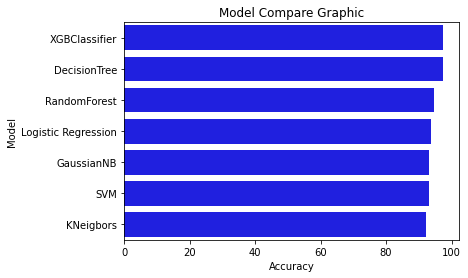

In [146]:
sns.barplot(x='Accuracy',y='Model',data=dfs2,color='b')
plt.title('Model Compare Graphic');

## Model Tuning

In [147]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [148]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train,y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print(' {}: \n Best Params: {} %'.format(i,best_param))
    
    
    print('')
    print('-'*25)
    print('')

 XGBClassifier(): 
 Best Accuracy: 95.82 %
 XGBClassifier(): 
 Best Params: {'eval_metric': 'error', 'learning_rate': 0.05} %

-------------------------

 KNeighborsClassifier(): 
 Best Accuracy: 94.29 %
 KNeighborsClassifier(): 
 Best Params: {'metric': 'manhattan', 'n_neighbors': 10} %

-------------------------

 DecisionTreeClassifier(): 
 Best Accuracy: 93.41 %
 DecisionTreeClassifier(): 
 Best Params: {'criterion': 'gini', 'random_state': 0} %

-------------------------

 RandomForestClassifier(): 
 Best Accuracy: 96.27 %
 RandomForestClassifier(): 
 Best Params: {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0} %

-------------------------



              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC AUC score: 0.999047316608447
Accuracy Score:  0.9736842105263158


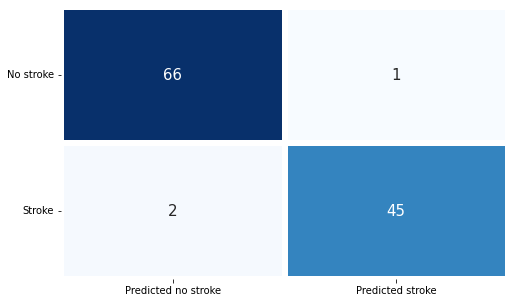

Text(0.5, 0, 'False Positive Rate')

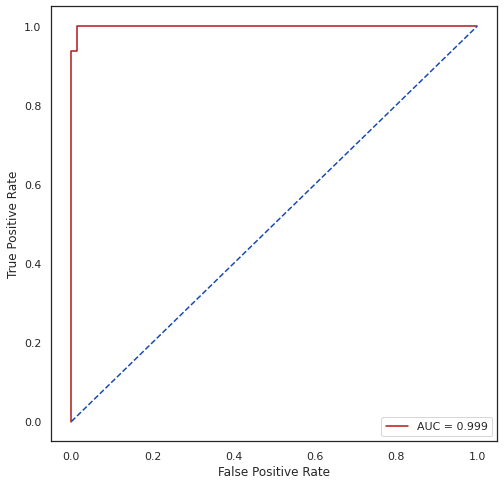

In [149]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')